<a href="https://colab.research.google.com/github/salmeronale/metodos-numericos/blob/main/Polinomio_interpolante_newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
#importar las librerías que se usan

In [18]:
n = int(input("Ingresa el número de datos: ")) #pregunar cuantas parejas ordenadas de datos se tienen en la tabla

Ingresa el número de datos: 6


In [19]:
#crear los arreglos para almacenar los datos de x y f(x)
X=np.array([])
Y=np.array([])

#crear un ciclo para pedir los datos
for i in range(n):
    x = float(input(f"Ingresa el valor de x{i+1}: "))
    y = float(input(f"Ingresa el valor de f(x{i+1}): "))
    X=np.append(X,x) #almacenar los datos de x
    Y=np.append(Y,y) #almacenar los datos de y

#print(X)
#print(Y)

Ingresa el valor de x1: 0
Ingresa el valor de f(x1): -5
Ingresa el valor de x2: 1
Ingresa el valor de f(x2): 1
Ingresa el valor de x3: 2
Ingresa el valor de f(x3): 9
Ingresa el valor de x4: 3
Ingresa el valor de f(x4): 25
Ingresa el valor de x5: 4
Ingresa el valor de f(x5): 55
Ingresa el valor de x6: 5
Ingresa el valor de f(x6): 105
[0. 1. 2. 3. 4. 5.]
[ -5.   1.   9.  25.  55. 105.]


In [55]:
diferencia = Y #inicializar los datos con y o f(x)
nivel = 0 #inicializar contador de diferencias (deltay1, deltay2, etc)
deltas = {}

# Ciclo while que se repite hasta que la lista de diferencia esté vacía o tenga una suma de 0
while len(diferencia) > 1 and np.any(diferencia):
    diferencia = np.diff(diferencia)  # Calcula la diferencia entre elementos consecutivos
    deltas[f"deltay{nivel+1}"] = diferencia  # Guarda la lista de diferencias en el diccionario
    nivel += 1  # Incrementa el nivel de diferencia

# Para verificar las listas almacenadas
print(f"las diferencias (deltas de y) son: {deltas}")

grado=nivel - 1 #determinar el grado del polinomio dependiendo los deltas
print(f"el polinomio será de grado {grado} porque las diferencias se hacen 0 en deltay{nivel}")

las diferencias (deltas de y) son: {'deltay1': array([ 6.,  8., 16., 30., 50.]), 'deltay2': array([ 2.,  8., 14., 20.]), 'deltay3': array([6., 6., 6.]), 'deltay4': array([0., 0.])}
el polinomio será de grado 3 porque las diferencias se hacen 0 en deltay4


In [82]:
m=int(input("ingrese el número de valores que desea interpolar: "))
XI=np.array([])
YI=np.array([])
for i in range(m):
  #pedir xk
  xk=float(input("ingresar el valor de x el cual desea saber f(x): "))

  #seleccionar x0
  menores_a_xk = [x for x in X if x < xk]
  if menores_a_xk:
    # Encontrar el elemento menor a xk más cercano
    x0 = min(menores_a_xk, key=lambda x: abs(x - xk))
    ii = np.where(X == x0)[0][0] #ubicar índice de x0 porque se ocupa más adelante
  print(f"x0={x0}")

  #calcular h
  H=np.diff(X) #calcular la diferencia de los x
  if np.all(H == H[0]):
    h = float(H[0])
  else:
    print("la diferencias de los x son diferentes, favor de ingresar de nuevo los valores")

    #calcular k
  k=(xk - x0)/h
  print(f"k={k}")

  #calcular los coeficientes binomiales
  B=np.array([]) #crear arreglo para almacenar los datos
  for i in range(grado): #range  = grado del polinomio porque así es la formula del polinomio de newton
    bin=sp.binom(k,i+1) #calcular cada coeficiente binomial
    B=np.append(B,bin)
 # print(B)

  #POLINOMIO DE NEWTON
  suma=0 #inicializar la suma
  for i in range(grado):
    clave = f'deltay{i+1}'  # Genera la clave
    deltay = deltas[clave]
    mult = B[i] * deltay[ii]
 # print(deltay)
 # print(mult)
    suma+=mult

#calcular f(xk):
  yk= Y[ii] + suma
  print(f"f({xk})={yk}")

  XI=np.append(XI,xk) #almacenar los datos de interpolación de x
  YI=np.append(YI,yk) #almacenar los datos de interpolación de y

  print("------------------------------------------")

ingrese el número de valores que desea interpolar: 4
ingresar el valor de x el cual desea saber f(x): 0.4
x0=0.0
k=0.4
f(0.4)=-2.456000000000001
------------------------------------------
ingresar el valor de x el cual desea saber f(x): 1.3
x0=1.0
k=0.30000000000000004
f(1.3)=2.9170000000000007
------------------------------------------
ingresar el valor de x el cual desea saber f(x): 1.8
x0=1.0
k=0.8
f(1.8)=6.952000000000001
------------------------------------------
ingresar el valor de x el cual desea saber f(x): 2.5
x0=2.0
k=0.5
f(2.5)=15.625
------------------------------------------


In [93]:
#calcular la función
from scipy.interpolate import interp1d #importar la librería necesaria
x_interp = np.linspace(0, 5, 50)
# Crear una función de interpolación
interpolacion = interp1d(X, Y, kind='cubic')  # kind='cubic' para interpolación cúbica porque grado del polinomio fue 3 (modificar después dependiendo el grado)

# Calcular los valores interpolados
y_interp = interpolacion(x_interp)

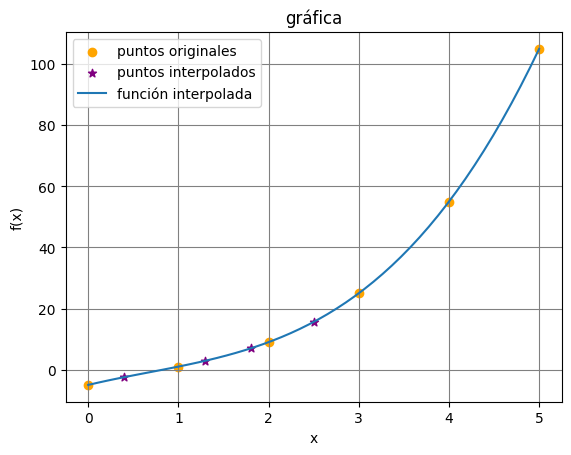

In [92]:
#Graficamos los datos
plt.scatter(X,Y, color="orange", label="puntos originales", marker='o')
plt.scatter(XI,YI, color="purple", label="puntos interpolados", marker='*')
plt.plot(x_interp, y_interp, '-', label="función interpolada")
plt.title("gráfica")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(color="gray")
plt.legend()
plt.show()